In [1]:
from ml_config import *

In [4]:
coupon = pd.read_csv('../data/coupon_list_train.csv',memory_map=True,index_col=0)

In [7]:
coupon.describe()

,PRICE_RATE,CATALOG_PRICE,DISCOUNT_PRICE,DISPPERIOD,VALIDPERIOD,USABLE_DATE_MON,USABLE_DATE_TUE,USABLE_DATE_WED,USABLE_DATE_THU,USABLE_DATE_FRI,USABLE_DATE_SAT,USABLE_DATE_SUN,USABLE_DATE_HOLIDAY,USABLE_DATE_BEFORE_HOLIDAY
count,19413.000000,19413.000000,19413.000000,19413.000000,13266.000000,12408.000000,12408.000000,12408.000000,12408.000000,12408.000000,12408.000000,12408.000000,12408.000000,12408.000000
mean,58.478391,11818.368258,4332.877659,3.166950,125.955902,0.936009,0.953901,0.982189,0.981867,1.000242,1.067618,0.921422,0.938024,1.044246
std,11.266571,16881.898880,5459.667448,1.346859,46.599249,0.309854,0.314045,0.217525,0.198105,0.319562,0.563260,0.424181,0.399619,0.534511
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50.000000,3675.000000,1550.000000,2.000000,89.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,53.000000,6500.000000,2750.000000,3.000000,128.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,65.000000,13650.000000,4800.000000,4.000000,177.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,100.000000,680000.000000,100000.000000,36.000000,179.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [8]:
coupon.columns

Index(['CAPSULE_TEXT', 'GENRE_NAME', 'PRICE_RATE', 'CATALOG_PRICE',
       'DISCOUNT_PRICE', 'DISPFROM', 'DISPEND', 'DISPPERIOD', 'VALIDFROM',
       'VALIDEND', 'VALIDPERIOD', 'USABLE_DATE_MON', 'USABLE_DATE_TUE',
       'USABLE_DATE_WED', 'USABLE_DATE_THU', 'USABLE_DATE_FRI',
       'USABLE_DATE_SAT', 'USABLE_DATE_SUN', 'USABLE_DATE_HOLIDAY',
       'USABLE_DATE_BEFORE_HOLIDAY', 'large_area_name', 'ken_name',
       'small_area_name', 'COUPON_ID_hash'],
      dtype='object')

In [9]:
coupon

,CAPSULE_TEXT,GENRE_NAME,PRICE_RATE,CATALOG_PRICE,DISCOUNT_PRICE,DISPFROM,DISPEND,DISPPERIOD,VALIDFROM,VALIDEND,...,USABLE_DATE_THU,USABLE_DATE_FRI,USABLE_DATE_SAT,USABLE_DATE_SUN,USABLE_DATE_HOLIDAY,USABLE_DATE_BEFORE_HOLIDAY,large_area_name,ken_name,small_area_name,COUPON_ID_hash
0,Food,Food,50,3000,1500,2011-07-08 12:00:00,2011-07-09 12:00:00,1,2011-07-10,2011-12-08,...,1.0,0.0,0.0,1.0,1.0,0.0,Kanto,Saitama Prefecture,Saitama,6b263844241eea98c5a97f1335ea82af
1,Food,Food,51,2080,1000,2011-07-01 12:00:00,2011-07-02 12:00:00,1,2011-07-03,2011-12-04,...,1.0,1.0,1.0,1.0,1.0,1.0,Kanto,Chiba Prefecture,Chiba,cc031f250e8bad1e24060263b9fc0ddd
2,Food,Food,50,7000,3500,2011-07-12 12:00:00,2011-07-15 12:00:00,3,2011-07-16,2012-01-11,...,1.0,1.0,1.0,1.0,1.0,1.0,Kanto,Chiba Prefecture,Chiba,ba5e9b7453ca52ff711635a5d2e8102d
3,Food,Food,50,3000,1500,2011-07-09 12:00:00,2011-07-11 12:00:00,2,2011-07-12,2011-12-01,...,1.0,0.0,0.0,1.0,1.0,1.0,Kanto,Chiba Prefecture,Chiba,3e1ffbedca3569f9e8032d401e8cb4e6
4,Food,Food,50,2000,1000,2011-07-05 12:00:00,2011-07-06 12:00:00,1,2011-07-07,2011-12-30,...,1.0,0.0,0.0,1.0,1.0,0.0,Kanto,Chiba Prefecture,Chiba,782934b6c815b4030ea204eef7d4a734
5,Food,Food,50,4000,2000,2011-07-24 12:00:00,2011-07-26 12:00:00,2,2011-07-27,2011-10-30,...,1.0,1.0,1.0,1.0,1.0,1.0,Kanto,Chiba Prefecture,Chiba,439db4336f84d4e4a13290fc0d7e6c4e
6,Food,Food,51,3495,1700,2011-09-03 12:00:00,2011-09-05 12:00:00,2,2011-09-07,2012-02-28,...,1.0,1.0,1.0,1.0,1.0,1.0,Kanto,Tokyo,"Shinjuku, Takadanobaba Nakano - Kichijoji",c9144a97ed61cb778414b758c704d828
7,Food,Food,51,3100,1500,2011-08-02 12:00:00,2011-08-04 12:00:00,2,2011-08-05,2012-01-31,...,1.0,1.0,1.0,0.0,1.0,1.0,Kansai,Kyoto,Kyoto,2b00d8dfc1a9fcf58e5014cbfd4a1e48
8,Food,Food,50,3500,1750,2011-08-11 12:00:00,2011-08-13 12:00:00,2,2011-08-14,2011-11-14,...,1.0,1.0,1.0,1.0,1.0,1.0,Kanto,Tokyo,"Ebisu, Meguro Shinagawa",74e3a12659d38ef20378f156cfeaf204
9,Food,Food,57,10500,4500,2011-09-21 12:00:00,2011-09-24 12:00:00,3,2011-09-26,2012-02-29,...,0.0,0.0,1.0,0.0,0.0,1.0,Kanto,Tokyo,"Ginza Shinbashi, Tokyo, Ueno",8a0ab8c5dd5014df8b4860233238ed44


In [25]:
unique = pd.unique(coupon['CAPSULE_TEXT'])
unique

array(['Food', 'Hair salon', 'Spa', 'Relaxation', 'Beauty',
       'Nail and eye salon', 'Delivery service', 'Lesson', 'Gift card',
       'Other', 'Leisure', 'Hotel', 'Japanese hotel', 'Vacation rental',
       'Lodge', 'Resort inn', 'Guest house', 'Japanse guest house',
       'Public hotel', 'Event', 'Web service', 'Health and medical',
       'Class', 'Correspondence course'], dtype=object)

In [26]:
len(unique)

24

In [167]:
counts = []
total = 0
for each in unique:
    tmp = coupon['CAPSULE_TEXT']
    count = len(tmp[tmp == each])
    total += count
    counts.append((each, count/19413))

counts = sorted(counts, key=lambda k: k[1], reverse=True)
total

19413

In [168]:
counts

[('Delivery service', 0.30088085303662493),
 ('Food', 0.18843043321485603),
 ('Hotel', 0.10008757018492763),
 ('Hair salon', 0.0739710503271004),
 ('Japanese hotel', 0.0695925410807191),
 ('Relaxation', 0.056096430227167364),
 ('Other', 0.042600319373615615),
 ('Spa', 0.03904600010302375),
 ('Lesson', 0.034667490856642454),
 ('Leisure', 0.034203883995260906),
 ('Nail and eye salon', 0.03224643280276104),
 ('Gift card', 0.005357234842631227),
 ('Resort inn', 0.005305722969144388),
 ('Japanse guest house', 0.005099675475197033),
 ('Health and medical', 0.0028331530417761296),
 ('Beauty', 0.0022150105599340647),
 ('Web service', 0.002163498686447226),
 ('Vacation rental', 0.001442332457631484),
 ('Lodge', 0.0012362849636841293),
 ('Guest house', 0.0006696543553289033),
 ('Correspondence course', 0.0006181424818420646),
 ('Class', 0.0005666306083552258),
 ('Public hotel', 0.0004636068613815484),
 ('Event', 0.00020604749394735486)]

In [61]:
gen = pd.unique(coupon['GENRE_NAME'])
gen

array(['Food', 'Hair salon', 'Spa', 'Relaxation', 'Beauty',
       'Nail and eye salon', 'Delivery service', 'Lesson', 'Gift card',
       'Other coupon', 'Leisure', 'Hotel and Japanese hotel',
       'Health and medical'], dtype=object)

In [62]:
len(gen)

13

In [165]:
counts1 = []
total = 0

for each in gen:
    tmp = coupon['GENRE_NAME']
    count = len(tmp[tmp == each])
    total += count
    counts1.append((each, count/19413))

counts1 = sorted(counts1, key=lambda k: k[1], reverse=True)
total

19413

In [166]:
counts1

[('Delivery service', 0.30088085303662493),
 ('Food', 0.18843043321485603),
 ('Hotel and Japanese hotel', 0.18389738834801422),
 ('Hair salon', 0.0739710503271004),
 ('Relaxation', 0.056096430227167364),
 ('Other coupon', 0.0449698655540102),
 ('Spa', 0.03904600010302375),
 ('Lesson', 0.03585226394683975),
 ('Leisure', 0.034203883995260906),
 ('Nail and eye salon', 0.03224643280276104),
 ('Gift card', 0.005357234842631227),
 ('Health and medical', 0.0028331530417761296),
 ('Beauty', 0.0022150105599340647)]

In [169]:
counts

[('Delivery service', 0.30088085303662493),
 ('Food', 0.18843043321485603),
 ('Hotel', 0.10008757018492763),
 ('Hair salon', 0.0739710503271004),
 ('Japanese hotel', 0.0695925410807191),
 ('Relaxation', 0.056096430227167364),
 ('Other', 0.042600319373615615),
 ('Spa', 0.03904600010302375),
 ('Lesson', 0.034667490856642454),
 ('Leisure', 0.034203883995260906),
 ('Nail and eye salon', 0.03224643280276104),
 ('Gift card', 0.005357234842631227),
 ('Resort inn', 0.005305722969144388),
 ('Japanse guest house', 0.005099675475197033),
 ('Health and medical', 0.0028331530417761296),
 ('Beauty', 0.0022150105599340647),
 ('Web service', 0.002163498686447226),
 ('Vacation rental', 0.001442332457631484),
 ('Lodge', 0.0012362849636841293),
 ('Guest house', 0.0006696543553289033),
 ('Correspondence course', 0.0006181424818420646),
 ('Class', 0.0005666306083552258),
 ('Public hotel', 0.0004636068613815484),
 ('Event', 0.00020604749394735486)]

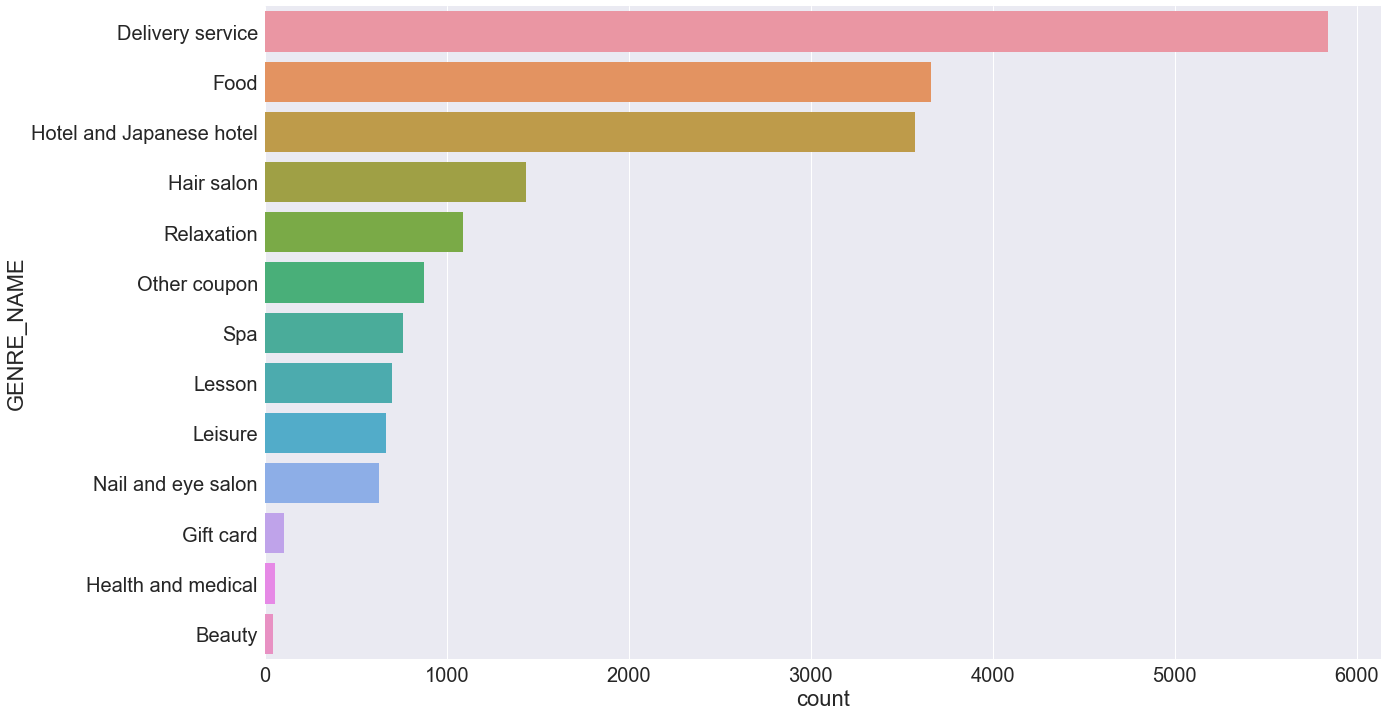

In [108]:
sns.set(font_scale=2)
plt.figure(figsize=(20, 12))
b = sns.countplot(y='GENRE_NAME', data = coupon, order = coupon['GENRE_NAME'].value_counts().index)

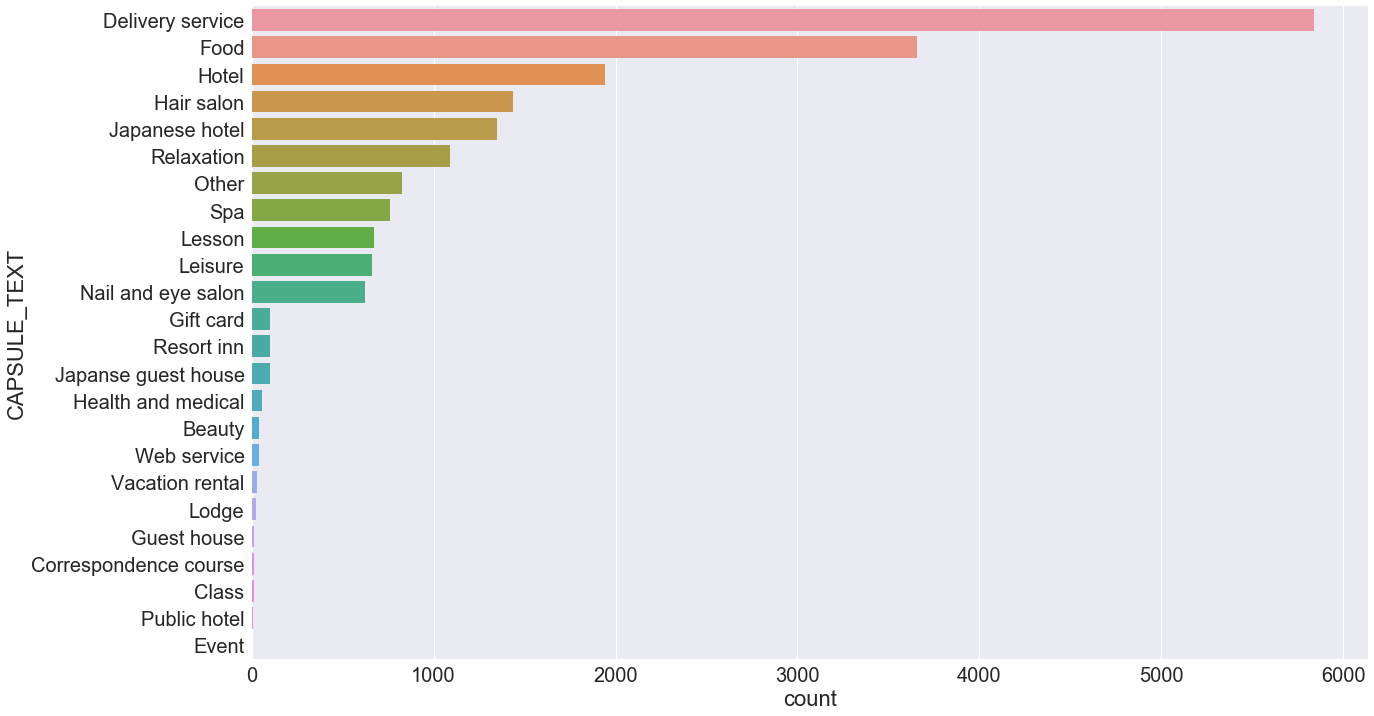

In [109]:
sns.set(font_scale=2)
plt.figure(figsize=(20, 12))
b = sns.countplot(y='CAPSULE_TEXT', data = coupon, order = coupon['CAPSULE_TEXT'].value_counts().index)

In [86]:
coupon.loc[1000:1100,['CAPSULE_TEXT','GENRE_NAME']].head()

,CAPSULE_TEXT,GENRE_NAME
1000,Nail and eye salon,Nail and eye salon
1001,Leisure,Leisure
1002,Food,Food
1003,Hair salon,Hair salon
1004,Hair salon,Hair salon


# CAPSULE_TEXT와 GENRE_NAME
### 1. 대분류 = GENRE_NAME, 소분류 = CAPSULE_TEXT
### 2. 소분류가 없는 서비스도 있다 (Delivery Service, Food etc)

--------------

# 쿠폰가격에 대해 파봄

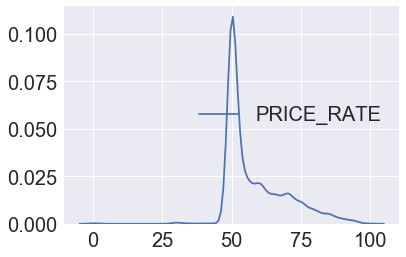

In [144]:
sns.kdeplot(coupon['PRICE_RATE'])

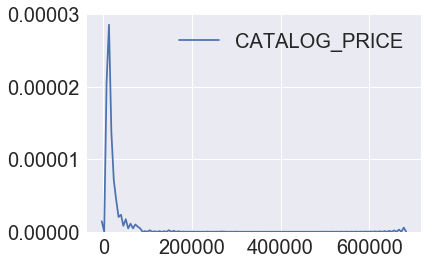

In [155]:
sns.kdeplot(coupon['CATALOG_PRICE'])

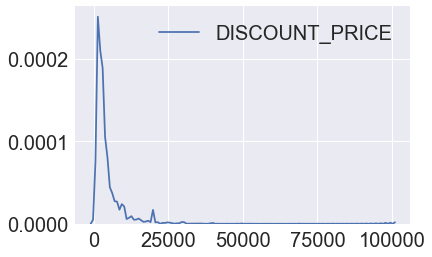

In [156]:
sns.kdeplot(coupon['DISCOUNT_PRICE'])

# 느낌이 잘 안온다
# 4분위로 아웃라이어를 제거한 그래프를 구하자

In [151]:
coupon['PRICE_RATE'].quantile([.25,.75])

0.25    50.0
0.75    65.0
Name: PRICE_RATE, dtype: float64

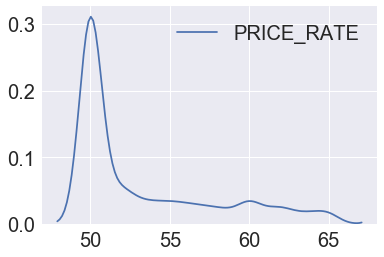

In [150]:
tmp = coupon['PRICE_RATE']
no_out = tmp[(50<=tmp) & (tmp<=65)]
sns.kdeplot(no_out)

# 50% 세일이 제일 많다

In [153]:
coupon['CATALOG_PRICE'].quantile([.25,.75])

0.25     3675.0
0.75    13650.0
Name: CATALOG_PRICE, dtype: float64

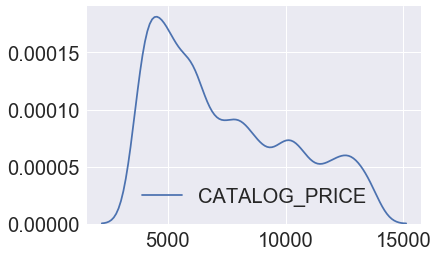

In [154]:
tmp = coupon['CATALOG_PRICE']
no_out = tmp[(3675<=tmp) & (tmp<=13650)]
sns.kdeplot(no_out)

# 5000엔이 제일 잘 팔린다

# 얘들이 할인된 가격은?

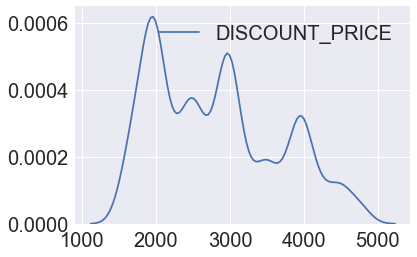

In [161]:
index = no_out.index
kk = coupon.loc[index, 'DISCOUNT_PRICE']
sns.kdeplot(kk)

# 2000, 3000, 4000엔이 두드러진다

# 그렇다면 할인가격만 떼놓고 봤을땐 어떨까

In [162]:
coupon['DISCOUNT_PRICE'].quantile([.25,.75])

0.25    1550.0
0.75    4800.0
Name: DISCOUNT_PRICE, dtype: float64

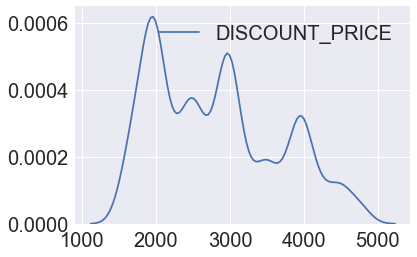

In [163]:
tmp = coupon['DISCOUNT_PRICE']
no_out = tmp[(1550<=tmp) & (tmp<=4800)]
sns.kdeplot(no_out)

## 같아보인다. 어쩌면 당연할 지도 모른다
## 그럼 할인은 얼마나 자주 일어날까?

In [180]:
pd.unique(coupon['PRICE_RATE'])

array([ 50,  51,  57,  61,  60,  56,  30,  52,  90,  54,  40,  58,  86,
        69,  84,  55,  62,  68,  53,  74,  63,  80,  88,  66,  81,  65,
        78,  70,  67,  79,  75,  64,  82,  76,  71,  73,  59,  72,  77,
        83,  85,  95,  94,  44,  43,  87,  93,  42,  38,  92,  96,  33,
        91,  89,  34,  39,  32,  31,  46,  45,  35,  37,  20,  16,  49,
        97, 100,   0,   3,  11,  36], dtype=int64)

In [182]:
dis_rate = coupon['PRICE_RATE']
len(dis_rate[dis_rate==0])

23

## 전체 19413개의 팔린 쿠폰 중에 23개만 원가로 팔림
## 그럼 그 23개는 가격이 얼말까

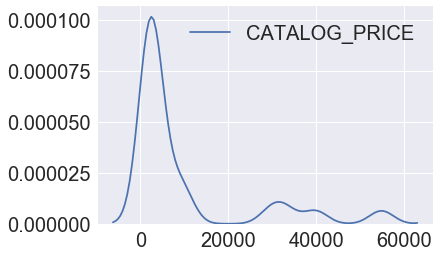

In [186]:
zero = dis_rate[dis_rate==0]
zero_index = zero.index
tmp = coupon.loc[zero_index, 'CATALOG_PRICE']
sns.kdeplot(tmp)

## 대강 원래 CATALOG_PRICE의 경향을 따르니 특이한 점은 없다

--------------

# 여기까지 정리
### 1. 종류에 대해 CAPSULE_TEXT는 세세히, GENRE_NAME은 개략적으로 분류
### 2. 배달, 음식쿠폰이 전체 쿠폰의 약 절반(48%)을 차지함
### 3. 50%세일, 원가는 5000엔, 할인가는 2000엔이 제일 많다
### 4. 할인이 안된 애는 19413개 중 23개밖에 안됨
### 5. 할인을 많이 하는게 꼭 Udemy같다

----------------------------------


In [187]:
coupon['DISPFROM'] = pd.to_datetime(coupon['DISPFROM'])
coupon['FROM_YEAR'] = coupon['DISPFROM'].dt.year
coupon['FROM_MONTH'] = coupon['DISPFROM'].dt.month
coupon['FROM_DAY'] = coupon['DISPFROM'].dt.day

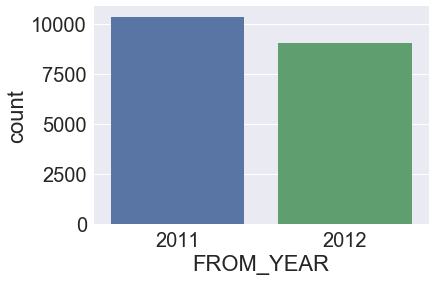

In [188]:
sns.countplot('FROM_YEAR', data=coupon)

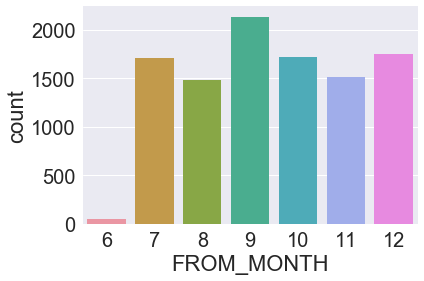

In [192]:
sns.countplot('FROM_MONTH',data=coupon[coupon['FROM_YEAR']==2011])

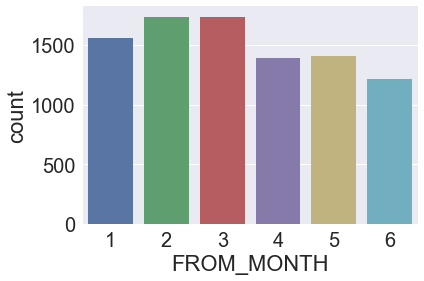

In [193]:
sns.countplot('FROM_MONTH',data=coupon[coupon['FROM_YEAR']==2012])

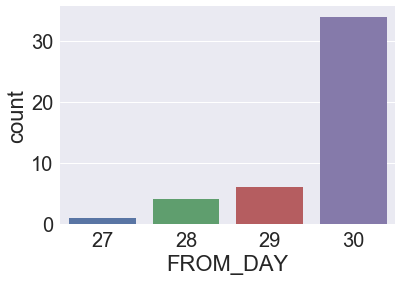

In [194]:
sns.countplot('FROM_DAY',data=coupon[(coupon['FROM_YEAR']==2011) & (coupon['FROM_MONTH']==6)])

In [197]:
coupon['DISPEND'] = pd.to_datetime(coupon['DISPEND'])
coupon['END_YEAR'] = coupon['DISPEND'].dt.year
coupon['END_MONTH'] = coupon['DISPEND'].dt.month
coupon['END_DAY'] = coupon['DISPEND'].dt.day

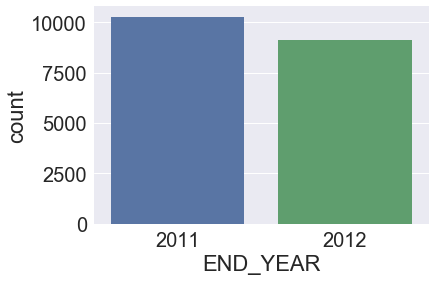

In [198]:
sns.countplot('END_YEAR', data=coupon)

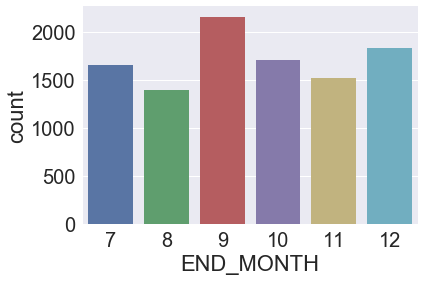

In [202]:
sns.countplot('END_MONTH',data=coupon[coupon['END_YEAR']==2011])

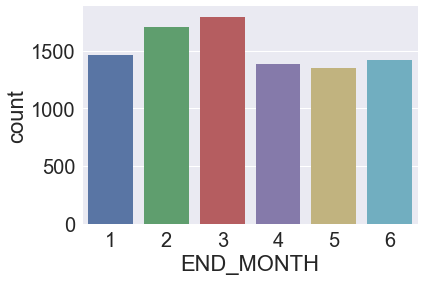

In [201]:
sns.countplot('END_MONTH',data=coupon[coupon['END_YEAR']==2012])

# 2011년에 2012년보다 많이 팜

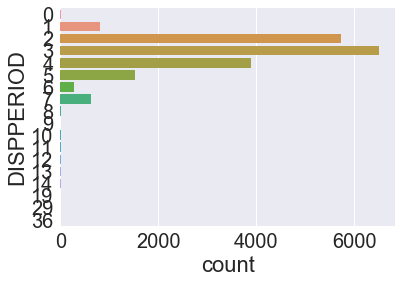

In [203]:
sns.countplot(y='DISPPERIOD',data=coupon)

In [205]:
coupon['DISPPERIOD'].quantile([.25, .75])

0.25    2.0
0.75    4.0
Name: DISPPERIOD, dtype: float64

In [207]:
tmp = coupon['DISPPERIOD']
len(tmp[(2<=tmp) & (tmp<=4)])

16152

In [208]:
print(16152/19413)

0.8320197805594189


# 2~4일의 기간동안 팔린 쿠폰이 전체의 80%를 차지

--------------

In [209]:
coupon['VALIDFROM'] = pd.to_datetime(coupon['VALIDFROM'])
coupon['FROM_YEAR'] = coupon['VALIDFROM'].dt.year
coupon['FROM_MONTH'] = coupon['VALIDFROM'].dt.month
coupon['FROM_DAY'] = coupon['VALIDFROM'].dt.day

In [210]:
coupon['VALIDEND'] = pd.to_datetime(coupon['VALIDEND'])
coupon['END_YEAR'] = coupon['VALIDEND'].dt.year
coupon['END_MONTH'] = coupon['VALIDEND'].dt.month
coupon['END_DAY'] = coupon['VALIDEND'].dt.day

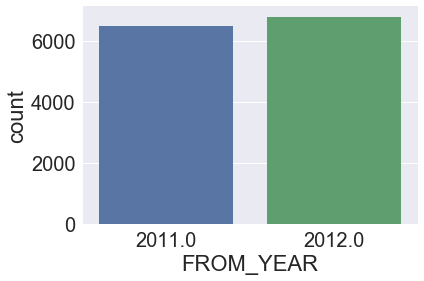

In [211]:
sns.countplot('FROM_YEAR', data=coupon)

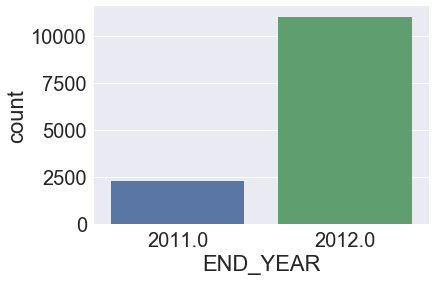

In [212]:
sns.countplot('END_YEAR', data=coupon)

# 2011년, 2012년에 VALIDABLE한 쿠폰 수는 같지만
# 대부분의 쿠폰이 2012년에 끝난다

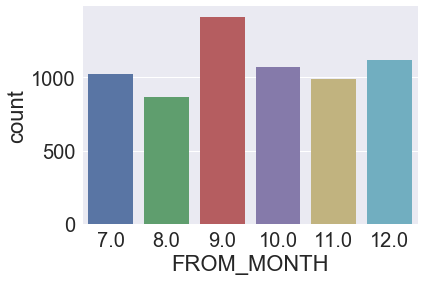

In [213]:
sns.countplot('FROM_MONTH',data=coupon[coupon['FROM_YEAR']==2011])

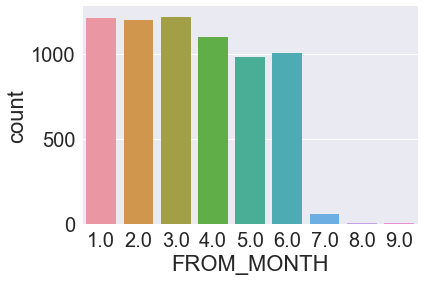

In [214]:
sns.countplot('FROM_MONTH',data=coupon[coupon['FROM_YEAR']==2012])

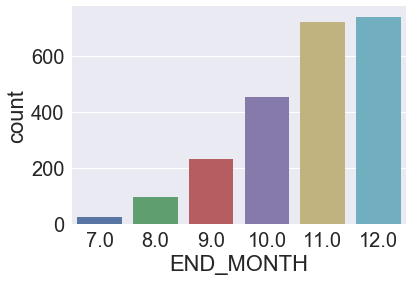

In [215]:
sns.countplot('END_MONTH',data=coupon[coupon['END_YEAR']==2011])

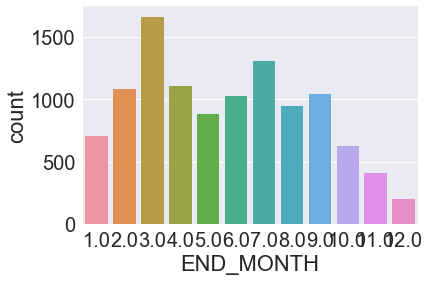

In [216]:
sns.countplot('END_MONTH',data=coupon[coupon['END_YEAR']==2012])

# 역시 2012년에 만료되는 쿠폰이 많다

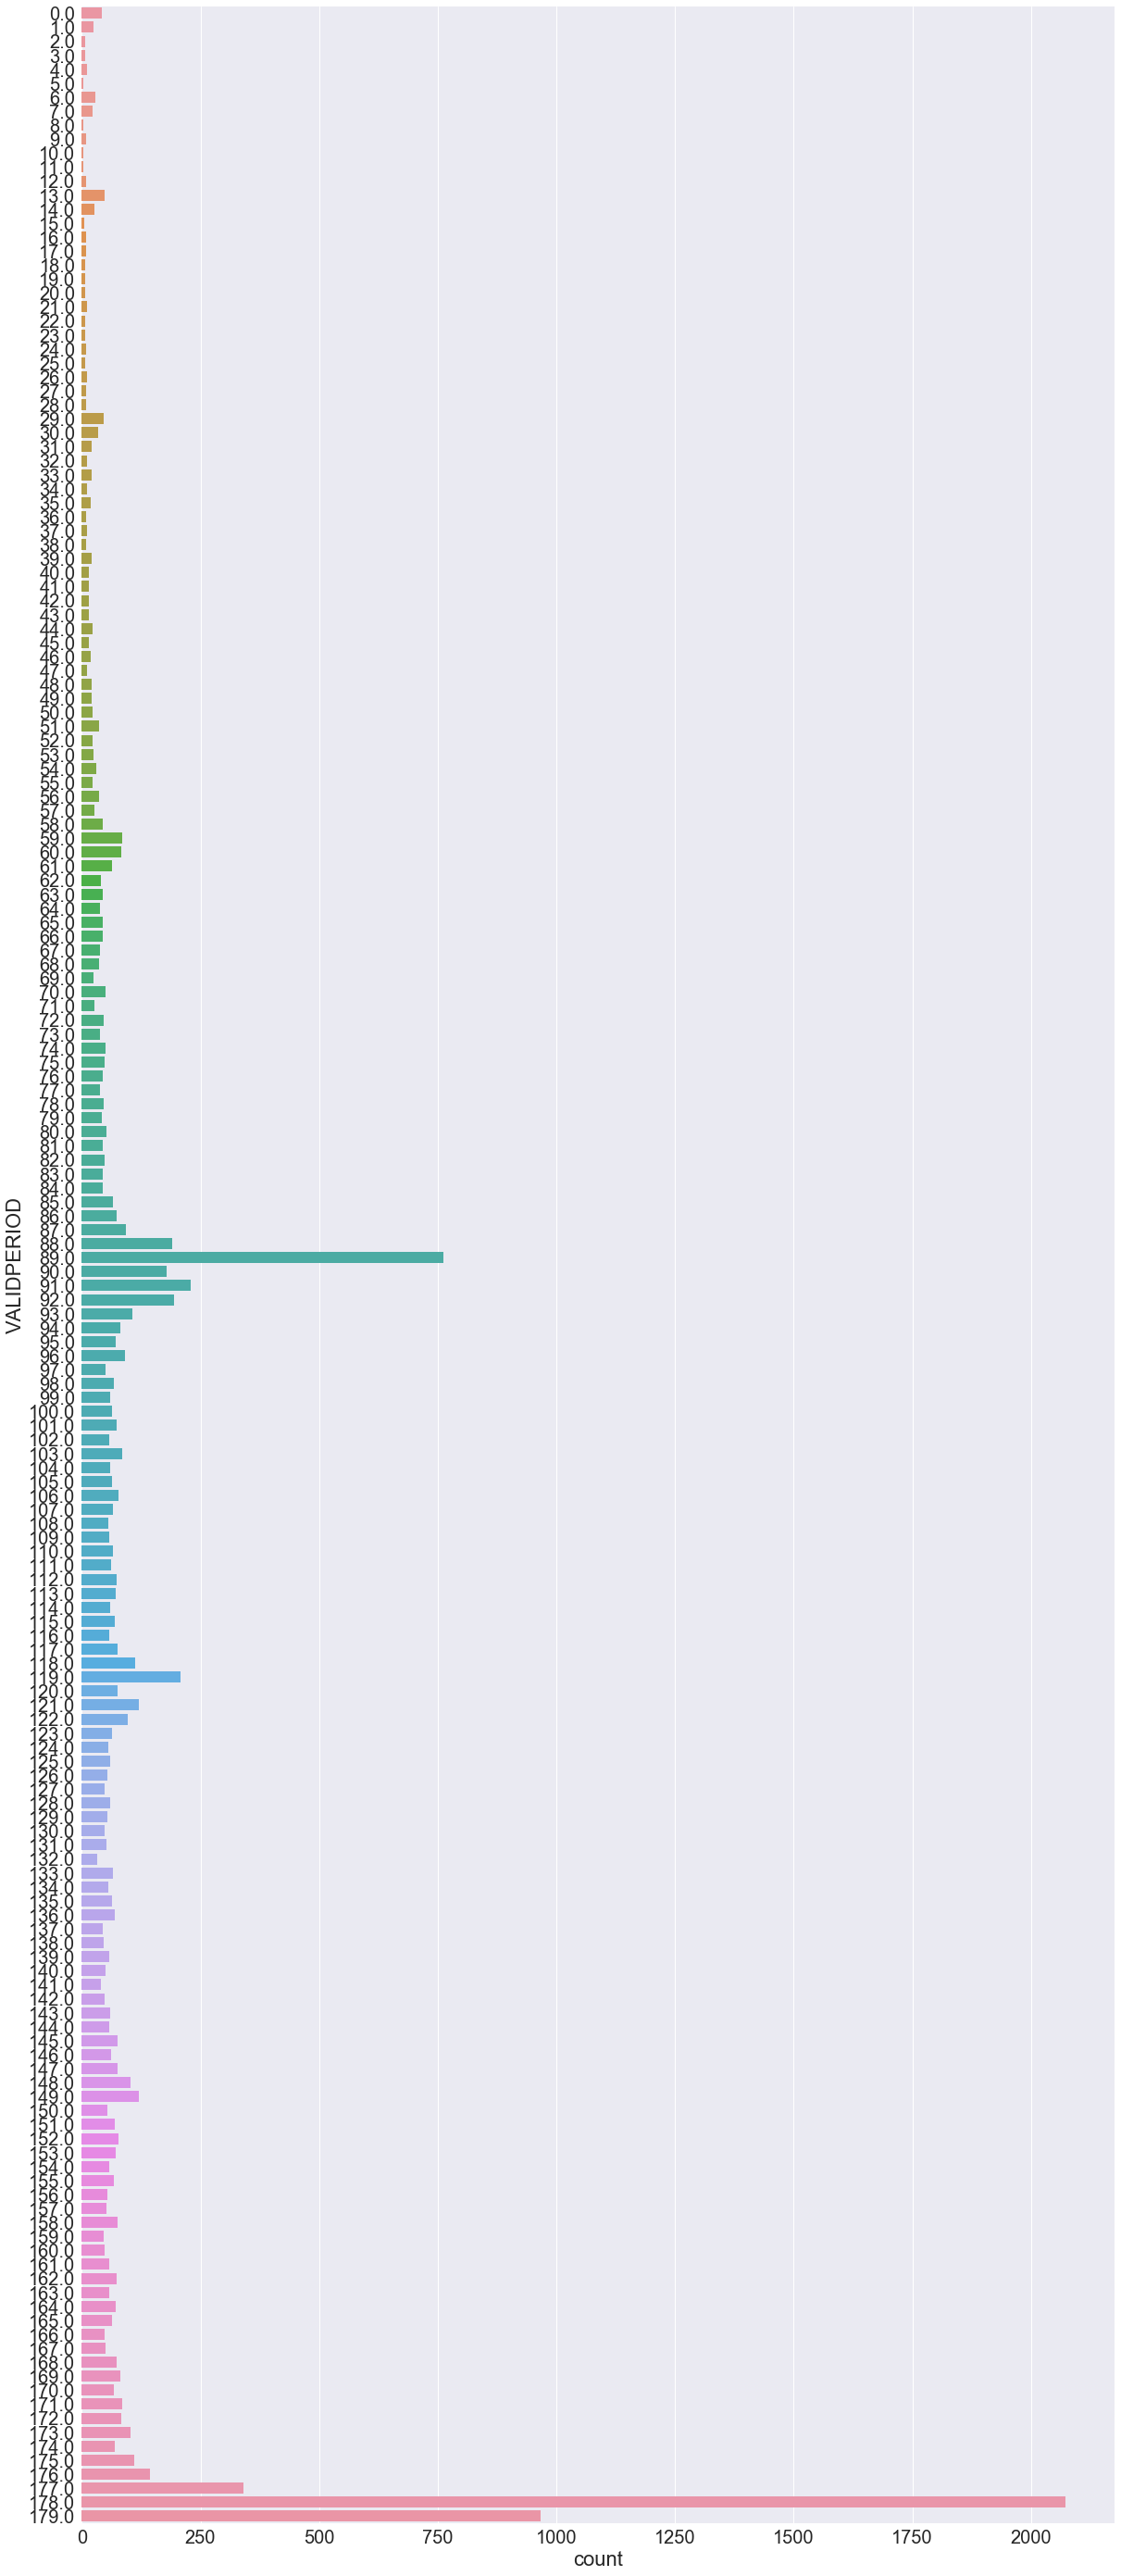

In [221]:
sns.set(font_scale=2)
plt.figure(figsize=(20, 50))
sns.countplot(y='VALIDPERIOD',data=coupon)

# 유효기간이 89일, 178일, 179일인 쿠폰이 압도적으로 많다
# 걔들의 종류는 뭘까

In [242]:
many = coupon['VALIDPERIOD']
many = many[(many == 89) | (many == 179) | (many == 178)]
many_index = many.index
those = coupon.loc[many_index, ['GENRE_NAME', 'CATALOG_PRICE']]
print(len(many))

3801


# 얘네는 총 3801개다

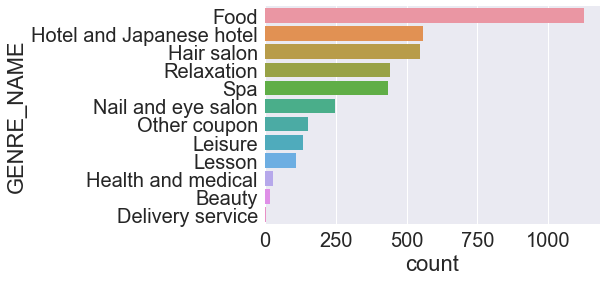

In [228]:
sns.countplot(y='GENRE_NAME', data=those,
              order=those['GENRE_NAME'].value_counts().index)

In [245]:
len(those[those['GENRE_NAME']=='Food'])

2532

In [246]:
2532/3801

0.6661404893449092

# 원래는 Delivery, Food가 많았는데
# 기간이 89,178,179일인 쿠폰을 찍으니 Delivery가 거의 없다
# 대신 Food가 66%를 차지하게 된다
# 이를 통해 Delivery 쿠폰은 대부분 짧은 기간을 가짐을 알 수 있다

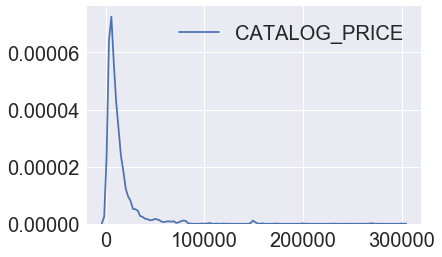

In [230]:
sns.kdeplot(those['CATALOG_PRICE'])

In [235]:
tmp = those['CATALOG_PRICE']
tmp.quantile([.25,.75])

0.25     4630.0
0.75    15000.0
Name: CATALOG_PRICE, dtype: float64

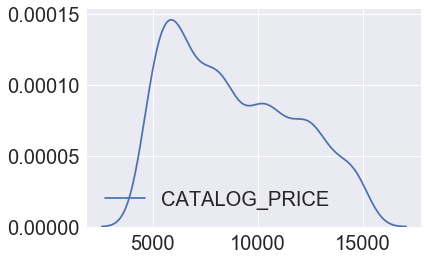

In [236]:
tmp = tmp[(4630<=tmp) & (tmp<=15000)]
tmp_index = tmp.index
sns.kdeplot(those.loc[tmp_index,'CATALOG_PRICE'])

In [244]:
3801/19413

0.19579663112347395

# 원래의 CATALOG_PRICE경향과 일치한다
# 여기까지 정리
### 1. 2011년에 2012년보다 많이 팔았고
### 2. 2~4일동안 판 쿠폰이 전체의 80%를 차지하고
### 3. 대부분의 쿠폰이 2012년에 끝나고
### 4. 유효기간이 89, 178, 179일인 쿠폰의 비중이 크다 (전체의 20%)
### 5. 이 기간의 쿠폰들엔 Delivery가 거의 포함되있지 않음.
### 6. 대신 Food가 66%를 차지
### 이는 원래의 경향과 어긋남

# 그럼 89, 178, 179일이 아닌 쿠폰들은 어떨까?

In [248]:
many = coupon['VALIDPERIOD']
many = many[(many != 89) & (many != 179) & (many != 178)]
many_index = many.index
those = coupon.loc[many_index, ['GENRE_NAME', 'CATALOG_PRICE']]
print(len(many))

15612


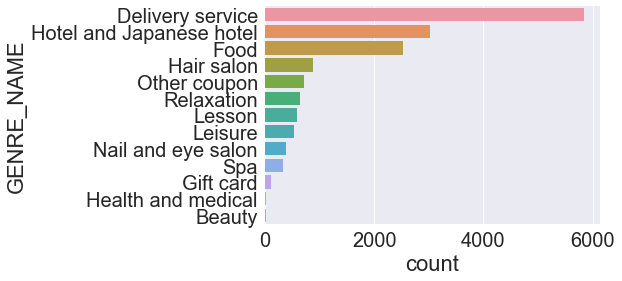

In [249]:
sns.countplot(y='GENRE_NAME', data=those,
              order=those['GENRE_NAME'].value_counts().index)

In [250]:
len(those[those['GENRE_NAME']=='Delivery service'])

5838

In [251]:
5838/15612

0.3739431206764028

# Delivry가 다시 올랐다
# 19413개 중 15612개를 포함하므로
# Food가 원래보다 한순위 내려갔으나
# 비교적 전체의 경향을 잘 반영한다

In [240]:
tmp = those['CATALOG_PRICE']
tmp.quantile([.25,.75])

0.25     3500.0
0.75    13230.0
Name: CATALOG_PRICE, dtype: float64

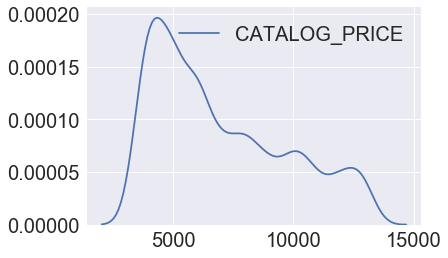

In [241]:
tmp = tmp[(3500<=tmp) & (tmp<=13230)]
tmp_index = tmp.index
sns.kdeplot(those.loc[tmp_index,'CATALOG_PRICE'])

# 여기까지 정리
### 1. 쿠폰유효기간 중 89, 178, 179일인 쿠폰이 전체 쿠폰의 20%를 차지
### 2. 전체 쿠폰은 Delivery, Food가 50%지만 얘네는 Food가 66%를 차지
### 3. 유효기간 중 위를 제외한 쿠폰은 전체 쿠폰의 80%를 차지
### 4. 얘네는 비교적 전체의 경향을 잘 반영한다

------------------------------------

In [263]:
cols = list(coupon.columns[11:20])
for col in cols:
    tmp = coupon[col]
    print(col, len(tmp[tmp==1])/19413, len(tmp[tmp==1]))

USABLE_DATE_MON 0.5751815793540411 11166
USABLE_DATE_TUE 0.5747694843661464 11158
USABLE_DATE_WED 0.6087158089939732 11817
USABLE_DATE_THU 0.613866996342657 11917
USABLE_DATE_FRI 0.5738937825168702 11141
USABLE_DATE_SAT 0.4334724153917478 8415
USABLE_DATE_SUN 0.5202184103435842 10099
USABLE_DATE_HOLIDAY 0.5346417349198991 10379
USABLE_DATE_BEFORE_HOLIDAY 0.4553134497501674 8839


# 휴일이나 주말에 사용가능한 쿠폰이 많을 줄 알았는데
# 오히려 주중에 가능한 쿠폰이 많다
# 월화수목으로 오르다가 목요일에 피크를 찍는다
# 그럼 왜 휴일이나 주말에 사용가능한 쿠폰이 적을까?
# 결국 쿠폰을 쓰려면 직원이 일을 해야 가능한데
# 휴일이나 주말엔 직원들이 일안해서?

-----------------------

In [264]:
pd.unique(coupon['large_area_name'])

array(['Kanto', 'Kansai', 'East Sea', 'Hokkaido', 'Kyushu-Okinawa',
       'Northeast', 'Shikoku', 'China', 'Hokushinetsu'], dtype=object)

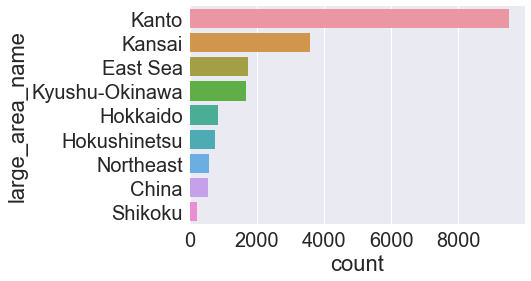

In [268]:
sns.countplot(y='large_area_name', data=coupon, order=coupon['large_area_name'].value_counts().index)

In [272]:
tmp = coupon['large_area_name']
len(tmp[tmp=='Kanto'])/19413

0.48951733374542833

In [273]:
len(tmp[tmp=='Kansai'])/19413

0.1841549477154484

# Kanto, Kansai가 쿠폰전체의 70%정도를 차지
# Kanto에 속하는 prefecture
## = Saitama, Chiba, Gunma, Tochigi, Ibaraki, Tokyo, Kanagawa

<img src="img/kanto.PNG">

# Kansai에 속하는 prefecture
## = Mie, Nara, Wakayama, Kyoto, Osaka, Hyōgo, Shiga, Tokushima, Tottori, Fukui

<img src="img/kansai.png">

In [265]:
pd.unique(coupon['ken_name'])

array(['Saitama Prefecture', 'Chiba Prefecture', 'Tokyo', 'Kyoto',
       'Aichi Prefecture', 'Kanagawa Prefecture', 'Hokkaido',
       'Fukuoka Prefecture', 'Tochigi Prefecture', 'Osaka prefecture',
       'Miyagi Prefecture', 'Fukushima Prefecture', 'Oita Prefecture',
       'Kochi Prefecture', 'Hiroshima Prefecture', 'Niigata Prefecture',
       'Okayama Prefecture', 'Ehime Prefecture', 'Kagawa Prefecture',
       'Tokushima Prefecture', 'Hyogo Prefecture', 'Gifu Prefecture',
       'Miyazaki Prefecture', 'Nagasaki Prefecture',
       'Ishikawa Prefecture', 'Yamagata Prefecture',
       'Shizuoka Prefecture', 'Aomori Prefecture', 'Okinawa', 'Akita',
       'Nagano Prefecture', 'Iwate Prefecture', 'Kumamoto Prefecture',
       'Yamaguchi Prefecture', 'Saga Prefecture', 'Nara Prefecture',
       'Mie', 'Gunma Prefecture', 'Wakayama Prefecture',
       'Yamanashi Prefecture', 'Tottori Prefecture',
       'Kagoshima prefecture', 'Fukui Prefecture', 'Shiga Prefecture',
       'Toyama Pre

In [266]:
pd.unique(coupon['small_area_name'])

array(['Saitama', 'Chiba', 'Shinjuku, Takadanobaba Nakano - Kichijoji',
       'Kyoto', 'Ebisu, Meguro Shinagawa', 'Ginza Shinbashi, Tokyo, Ueno',
       'Aichi', 'Kawasaki, Shonan-Hakone other', 'Hokkaido', 'Fukuoka',
       'Tochigi', 'Minami other', 'Shibuya, Aoyama, Jiyugaoka',
       'Ikebukuro Kagurazaka-Akabane', 'Akasaka, Roppongi, Azabu',
       'Yokohama', 'Miyagi', 'Fukushima', 'Much', 'Kochi',
       'Tachikawa Machida, Hachioji other', 'Hiroshima', 'Niigata',
       'Okayama', 'Ehime', 'Kagawa', 'Northern', 'Tokushima', 'Hyogo',
       'Gifu', 'Miyazaki', 'Nagasaki', 'Ishikawa', 'Yamagata', 'Shizuoka',
       'Aomori', 'Okinawa', 'Akita', 'Nagano', 'Iwate', 'Kumamoto',
       'Yamaguchi', 'Saga', 'Nara', 'Triple', 'Gunma', 'Wakayama',
       'Yamanashi', 'Tottori', 'Kagoshima', 'Fukui', 'Shiga', 'Toyama',
       'Shimane', 'Ibaraki'], dtype=object)